# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [27]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
Combined_data = pd.merge(mouse_metadata, study_results, how='outer')


# Display the data table for preview
Combined_data.head()


Mouse ID Drug Regimen   Sex  Age_months  Weight (g)  Timepoint  \
0     k403     Ramicane  Male          21          16          0   
1     k403     Ramicane  Male          21          16          5   
2     k403     Ramicane  Male          21          16         10   
3     k403     Ramicane  Male          21          16         15   
4     k403     Ramicane  Male          21          16         20   

   Tumor Volume (mm3)  Metastatic Sites  
0           45.000000                 0  
1           38.825898                 0  
2           35.014271                 1  
3           34.223992                 1  
4           32.997729                 1

In [2]:
# Checking the number of mice.
mice_count = Combined_data["Mouse ID"].value_counts()
number_of_mice = len(mice_count)
number_of_mice

249

In [4]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice = Combined_data.loc[Combined_data.duplicated(subset=['Mouse ID','Timepoint',]),'Mouse ID'].unique()
duplicate_mice

array(['g989'], dtype=object)

In [10]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mouse_id=Combined_data[Combined_data.duplicated(subset=['Mouse ID','Timepoint',],keep=False)]
duplicate_mouse_id

Mouse ID Drug Regimen     Sex  Age_months  Weight (g)  Timepoint  \
908     g989     Propriva  Female          21          26          0   
909     g989     Propriva  Female          21          26          0   
910     g989     Propriva  Female          21          26          5   
911     g989     Propriva  Female          21          26          5   
912     g989     Propriva  Female          21          26         10   
913     g989     Propriva  Female          21          26         10   
914     g989     Propriva  Female          21          26         15   
915     g989     Propriva  Female          21          26         15   
916     g989     Propriva  Female          21          26         20   
917     g989     Propriva  Female          21          26         20   

     Tumor Volume (mm3)  Metastatic Sites  
908           45.000000                 0  
909           45.000000                 0  
910           48.786801                 0  
911           47.570392                 0  
912           51.745156                 0  
913           49.880528                 0  
914           51.325852                 1  
915           53.442020                 0  
916           55.326122                 1  
917           54.657650                 1

In [12]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = Combined_data[Combined_data['Mouse ID'].isin(duplicate_mice)==False]
clean_df

Mouse ID Drug Regimen   Sex  Age_months  Weight (g)  Timepoint  \
0        k403     Ramicane  Male          21          16          0   
1        k403     Ramicane  Male          21          16          5   
2        k403     Ramicane  Male          21          16         10   
3        k403     Ramicane  Male          21          16         15   
4        k403     Ramicane  Male          21          16         20   
...       ...          ...   ...         ...         ...        ...   
1888     z969     Naftisol  Male           9          30         25   
1889     z969     Naftisol  Male           9          30         30   
1890     z969     Naftisol  Male           9          30         35   
1891     z969     Naftisol  Male           9          30         40   
1892     z969     Naftisol  Male           9          30         45   

      Tumor Volume (mm3)  Metastatic Sites  
0              45.000000                 0  
1              38.825898                 0  
2              35.014271                 1  
3              34.223992                 1  
4              32.997729                 1  
...                  ...               ...  
1888           63.145652                 2  
1889           65.841013                 3  
1890           69.176246                 4  
1891           70.314904                 4  
1892           73.867845                 4  

[1880 rows x 8 columns]

In [7]:
# Checking the number of mice in the clean DataFrame.
clean_mice_count = clean_df["Mouse ID"].value_counts()
clean_number_of_mice = len(clean_mice_count)
clean_number_of_mice


248

## Summary Statistics

In [14]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

grouped=clean_df.groupby('Drug Regimen')

gmean=grouped['Tumor Volume (mm3)'].mean()
gmedian=grouped['Tumor Volume (mm3)'].median()
gvariance=grouped['Tumor Volume (mm3)'].var()
gStdDev=grouped['Tumor Volume (mm3)'].std()
gStdErr=grouped['Tumor Volume (mm3)'].sem()

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 

# Assemble the resulting series into a single summary DataFrame.
Summary_df = pd.DataFrame({
    'Mean Tumor Volume':gmean,
    'Median Tumor Volume':gmedian,
    'Tumor Volume Variance':gvariance,
    'Tumor Volume Std. Dev.':gStdDev,
    'Tumor Volume Std. Err.':gStdErr
})

Summary_df





Mean Tumor Volume  Median Tumor Volume  Tumor Volume Variance  \
Drug Regimen                                                                  
Capomulin             40.675741            41.557809              24.947764   
Ceftamin              52.591172            51.776157              39.290177   
Infubinol             52.884795            51.820584              43.128684   
Ketapril              55.235638            53.698743              68.553577   
Naftisol              54.331565            52.509285              66.173479   
Placebo               54.033581            52.288934              61.168083   
Propriva              52.320930            50.446266              43.852013   
Ramicane              40.216745            40.673236              23.486704   
Stelasyn              54.233149            52.431737              59.450562   
Zoniferol             53.236507            51.818479              48.533355   

              Tumor Volume Std. Dev.  Tumor Volume Std. Err.  
Drug Regimen                                                  
Capomulin                   4.994774                0.329346  
Ceftamin                    6.268188                0.469821  
Infubinol                   6.567243                0.492236  
Ketapril                    8.279709                0.603860  
Naftisol                    8.134708                0.596466  
Placebo                     7.821003                0.581331  
Propriva                    6.622085                0.544332  
Ramicane                    4.846308                0.320955  
Stelasyn                    7.710419                0.573111  
Zoniferol                   6.966589                0.516398

In [15]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
Summary_df_Agg=grouped['Tumor Volume (mm3)'].agg(['mean', 'median', 'var', 'std', 'sem'])
Summary_df_Agg

mean     median        var       std       sem
Drug Regimen                                                     
Capomulin     40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin      52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol     52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril      55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol      54.331565  52.509285  66.173479  8.134708  0.596466
Placebo       54.033581  52.288934  61.168083  7.821003  0.581331
Propriva      52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane      40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn      54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol     53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

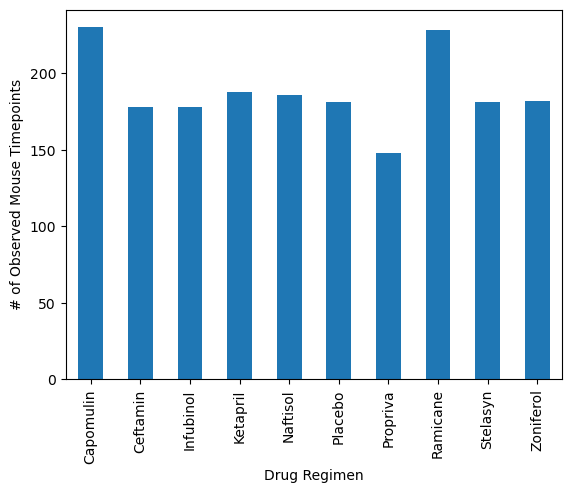

In [16]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
Drug_counts=grouped.size()
Drug_counts.plot(kind='bar')
plt.ylabel('# of Observed Mouse Timepoints')
plt.show()

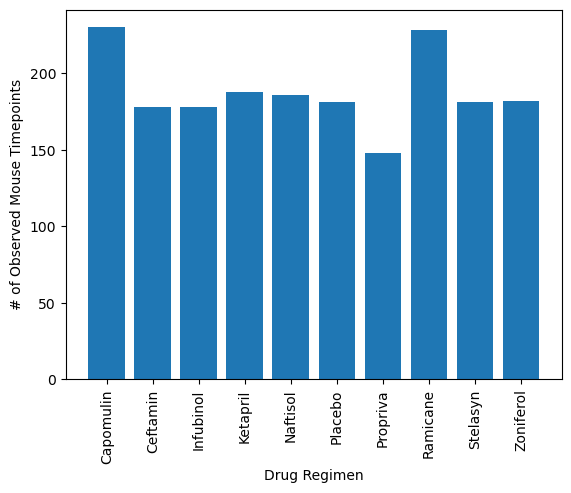

In [17]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
pyplotBar=grouped.size()
pyplotBar.index
plt.bar(pyplotBar.index,pyplotBar)
plt.xticks(rotation=90)
plt.xlabel('Drug Regimen')
plt.ylabel('# of Observed Mouse Timepoints')
plt.show()

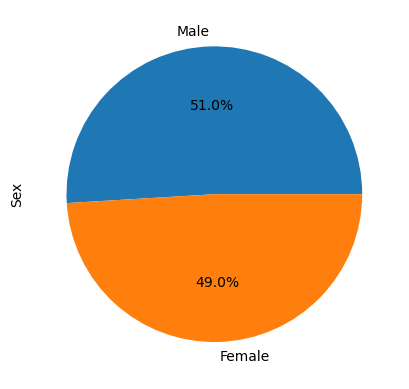

In [19]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
miceSex=clean_df['Sex'].value_counts()
miceSex.plot(kind='pie',autopct='%1.1f%%')
plt.ylabel('Sex')
plt.show()

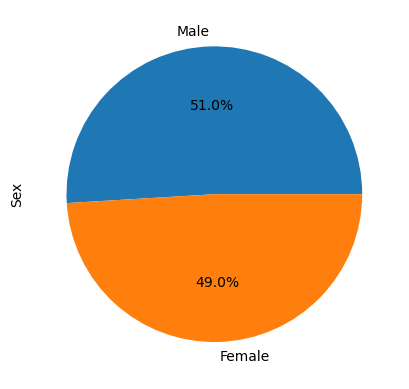

In [20]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(miceSex,labels=miceSex.index,autopct='%1.1f%%')
plt.ylabel('Sex')
plt.show()

## Quartiles, Outliers and Boxplots

In [21]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin


clean_df_final4=clean_df[(clean_df['Drug Regimen']=='Capomulin')|
                                     (clean_df['Drug Regimen']=='Ramicane')|
                                     (clean_df['Drug Regimen']=='Infubinol')|
                                     (clean_df['Drug Regimen']=='Ceftamin')
]
# Start by getting the last (greatest) timepoint for each mouse
lastTimepoint= clean_df_final4.groupby('Mouse ID')['Timepoint'].max()
lastTimepoint=lastTimepoint.reset_index()


# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
merged= pd.merge(clean_df_final4,lastTimepoint,on= ['Mouse ID','Timepoint'])
merged

Mouse ID Drug Regimen     Sex  Age_months  Weight (g)  Timepoint  \
0      k403     Ramicane    Male          21          16         45   
1      s185    Capomulin  Female           3          17         45   
2      x401    Capomulin  Female          16          15         45   
3      m601    Capomulin    Male          22          17         45   
4      g791     Ramicane    Male          11          16         45   
..      ...          ...     ...         ...         ...        ...   
95     x822     Ceftamin    Male           3          29         45   
96     y163    Infubinol  Female          17          27         45   
97     y769     Ceftamin  Female           6          27         45   
98     y865     Ceftamin    Male          23          26         45   
99     z581    Infubinol  Female          24          25         45   

    Tumor Volume (mm3)  Metastatic Sites  
0            22.050126                 1  
1            23.343598                 1  
2            28.484033                 0  
3            28.430964                 1  
4            29.128472                 1  
..                 ...               ...  
95           61.386660                 3  
96           67.685569                 3  
97           68.594745                 4  
98           64.729837                 3  
99           62.754451                 3  

[100 rows x 8 columns]

In [22]:
# Put treatments into a list for for loop (and later for plot labels)
DrugRegimen4=[
    'Capomulin', 
    'Ramicane', 
    'Infubinol', 
    'Ceftamin'
]

# Create empty list to fill with tumor vol data (for plotting)

tumor_final_list=[]

# Calculate the IQR and quantitatively determine if there are any potential outliers. 

for drug in DrugRegimen4:
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    tumor_final=merged[merged['Drug Regimen']==drug]['Tumor Volume (mm3)']
    
    # add subset 
    tumor_final_list.append(tumor_final)
    
    # Determine outliers using upper and lower bounds
    quartiles = tumor_final.quantile([.25,.5,.75])
    lowerq = quartiles[.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    outliers= tumor_final[(tumor_final>upper_bound) | (tumor_final<lower_bound) ]
    print(f"{drug}'s  potential outliers: {outliers}")

    
   


Capomulin's  potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's  potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's  potential outliers: 58    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's  potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


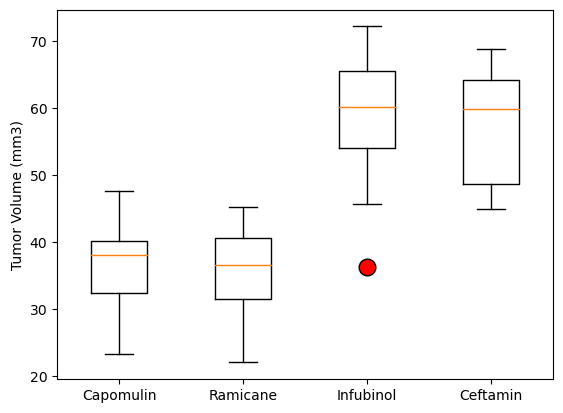

In [23]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.

fig1, ax1 = plt.subplots()
ax1.set_ylabel('Tumor Volume (mm3)')
bp = ax1.boxplot(tumor_final_list, labels=DrugRegimen4,notch=False, vert=True)
plt.setp(bp['fliers'], markersize=12.0,markerfacecolor= 'red')
plt.show()

## Line and Scatter Plots

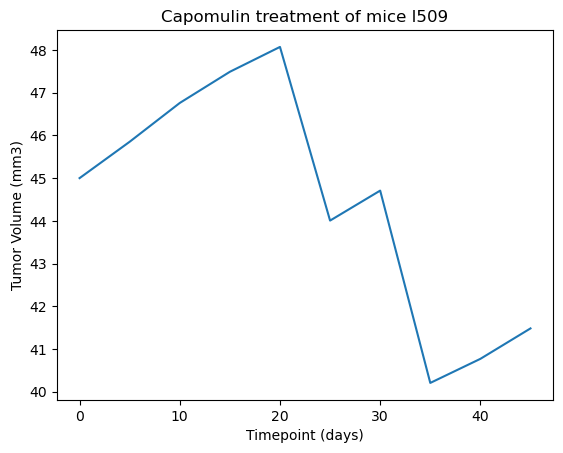

In [36]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin

Capomulin=clean_df[clean_df['Drug Regimen']=='Capomulin']

CapomulinMice=Capomulin[Capomulin['Mouse ID']=='l509']


plt.plot(CapomulinMice['Timepoint'],CapomulinMice['Tumor Volume (mm3)'])
plt.title(f'Capomulin treatment of mice l509')
plt.xlabel('Timepoint (days)')
plt.ylabel('Tumor Volume (mm3)')
plt.show()

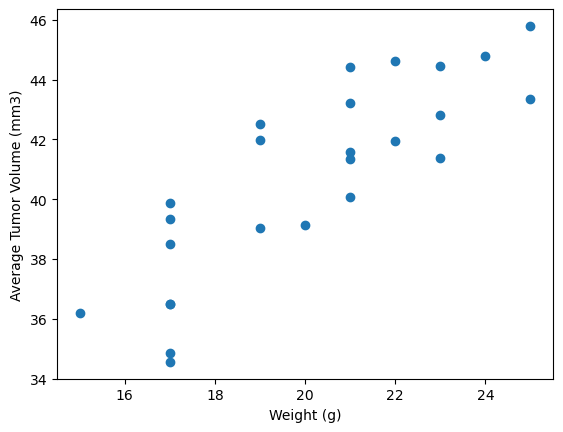

In [31]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
weight = Capomulin.groupby('Mouse ID')['Weight (g)'].first()
averageTumor = Capomulin.groupby('Mouse ID')['Tumor Volume (mm3)'].mean()


plt.scatter(weight,averageTumor)
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()

## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


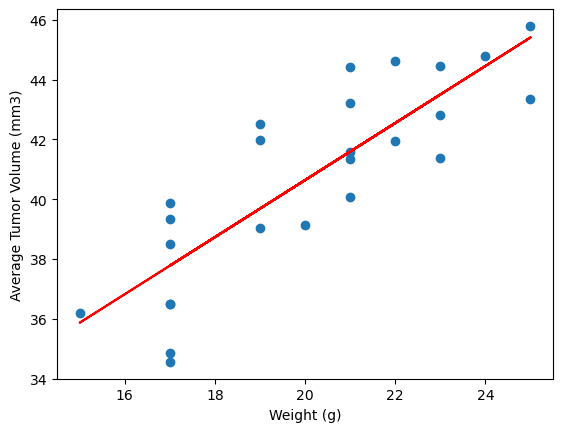

In [28]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen

correlation_coefficient, p_value = st.pearsonr(weight, averageTumor)
correlation_coefficient=round(correlation_coefficient,2)
print(f"The correlation between mouse weight and the average tumor volume is {correlation_coefficient}")


(slope, intercept, rvalue, pvalue, stderr) = linregress(weight, averageTumor)
regress_values = weight * slope + intercept

plt.scatter(weight,averageTumor)
plt.plot(weight,regress_values,"r-")

plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()